<a href="https://colab.research.google.com/github/dilia-w/Visao-Computacional/blob/main/09_Usando_SIFT_para_identificar_a_rota%C3%A7%C3%A3o_em_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

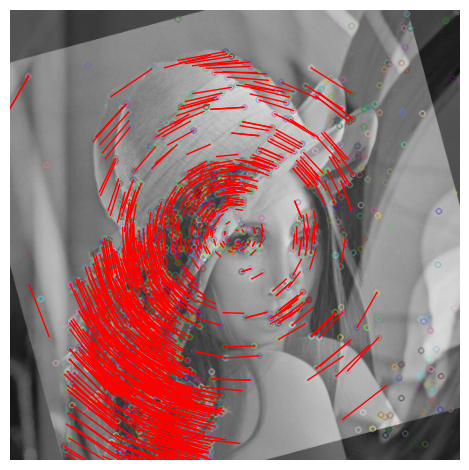

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Fazendo o download da imagem de Lena
image_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
urllib.request.urlretrieve(image_url, 'lena_gray.png')

# Lendo a imagem em escala de cinza
imagem = cv2.imread('lena_gray.png', cv2.IMREAD_GRAYSCALE)

# Detectando os pontos chave usando o SIFT
sift = cv2.SIFT_create()
keypoints = sift.detect(imagem, None)
imagem_sift = cv2.drawKeypoints(imagem, keypoints, None)

# Obtendo as dimensões da imagem e criando a matriz de rotação
altura, largura = imagem.shape[:2]
centro = (largura // 2, altura // 2)
angulo = 15
rotacao_matriz = cv2.getRotationMatrix2D(centro, angulo, 1)
imagem_rotacionada = cv2.warpAffine(imagem, rotacao_matriz, (largura, altura))

# Detectando pontos chave na imagem rotacionada e desenhando-os
keypoints_rotacionados = sift.detect(imagem_rotacionada, None)
imagem_sift_rotacionada = cv2.drawKeypoints(imagem_rotacionada, keypoints_rotacionados, None)

# Transformando os pontos chave originais com a matriz de rotação
pontos_originais = np.float32([keypoint.pt for keypoint in keypoints]).reshape(-1, 1, 2)
pontos_rotacionados = np.float32([keypoint.pt for keypoint in keypoints_rotacionados]).reshape(-1, 1, 2)
pontos_originais_transformados = cv2.transform(pontos_originais, rotacao_matriz)

# Desenhando linhas entre pontos correspondentes nas imagens original e rotacionada
for i in range(min(len(pontos_originais), len(pontos_rotacionados))):
    x1, y1 = pontos_originais[i][0]
    x2, y2 = pontos_rotacionados[i][0]
    x1_transformado, y1_transformado = pontos_originais_transformados[i][0]
    plt.plot([x1, x1_transformado], [y1, y1_transformado], 'r-', lw=1)

plt.axis('off')
plt.imshow(imagem_sift, cmap='gray')
plt.axis('off')
plt.imshow(imagem_sift_rotacionada, cmap='gray', alpha=0.5)
plt.axis('off')
plt.tight_layout()
plt.show()
